In [23]:
pip install gensim==3.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.6.0-cp310-cp310-linux_x86_64.whl size=23777925 sha256=45e99b52e75eb1cf0fe22c79fbaf74679fb2395b8950f26956cb3f1b5d78762b
  Stored in directory: /root/.cache/pip/wheels/00/e8/47/96f55c3144a5ea3537f549f7a97607011f5004b9f13fa8dcc5
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2


In [1]:
import requests
from bs4 import BeautifulSoup



In [3]:
def extract_article(url):
    # Send a GET request to the URL
    response = requests.get(url)

    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the main content element(s) based on HTML tags, class names, etc.
    main_content = soup.find('article')  # Example: find article tag

    # Extract the text from the main content element(s)
    article_text = main_content.get_text() if main_content else "Article not found or format not recognized"

    return article_text



In [4]:
# Example usage:
url = 'https://www.bbc.com/future/article/20240213-valentines-day-the-interspecies-relationships-that-evolved-in-nature'
article = extract_article(url)
print(article)

By Lucy Sherriff14th February 2024From bats and carnivorous plants to crocodiles and birds, nature is full of remarkable pairings that depend on each other to survive.AA green-brown spongy sludge congregates en masse across the surface of the Everglades' shallow marshes in southern Florida. At first glance, it may look like a harmful algal bloom that sucks oxygen from the water, suffocating the surrounding ecosystem and releasing toxins. But it is in fact a beautifully productive coupling of algae, fungi and a few other third, fourth and fifth wheels, such as plant detritus, microbes and bacteria.
This cluster of beings forms a perfectly matched relationship, known as a periphyton, and provides the cornerstone of the Everglades' highly biodiverse ecosystem explains Meenakshi Chabba, a scientist with the non-profit Florida's Everglades Foundation. "It's incredible because you have this community of organisms coming together and they form this matter which is the basis of the entire food

In [16]:
import re

Document = re.sub(r'\n|\r', ' ', article)
Document = re.sub(r' +', ' ', Document)
Document = Document.strip()

In [27]:
Document

'By Lucy Sherriff14th February 2024From bats and carnivorous plants to crocodiles and birds, nature is full of remarkable pairings that depend on each other to survive.AA green-brown spongy sludge congregates en masse across the surface of the Everglades\' shallow marshes in southern Florida. At first glance, it may look like a harmful algal bloom that sucks oxygen from the water, suffocating the surrounding ecosystem and releasing toxins. But it is in fact a beautifully productive coupling of algae, fungi and a few other third, fourth and fifth wheels, such as plant detritus, microbes and bacteria. This cluster of beings forms a perfectly matched relationship, known as a periphyton, and provides the cornerstone of the Everglades\' highly biodiverse ecosystem explains Meenakshi Chabba, a scientist with the non-profit Florida\'s Everglades Foundation. "It\'s incredible because you have this community of organisms coming together and they form this matter which is the basis of the entire

# Text Wrangling

In [24]:
from  gensim.summarization import summarize


In [71]:
print(summarize(Document, ratio=0.2, split = False))

By Lucy Sherriff14th February 2024From bats and carnivorous plants to crocodiles and birds, nature is full of remarkable pairings that depend on each other to survive.AA green-brown spongy sludge congregates en masse across the surface of the Everglades' shallow marshes in southern Florida.
This cluster of beings forms a perfectly matched relationship, known as a periphyton, and provides the cornerstone of the Everglades' highly biodiverse ecosystem explains Meenakshi Chabba, a scientist with the non-profit Florida's Everglades Foundation.
This latter type gets something out of the relationship, but they'd survive without each other just fine.Periphytons are formed from a cross-species coupling of algae and fungi, together with plant detritus, microbes and bacteria (Credit: Getty Images)In this sense, while periphyton's slimy mixing of algae and fungal matter perhaps isn't nature's most glamourous pairing, it has resulted in a symbiotic romance which has lasted for "probably hundreds o

In [33]:
import nltk

In [35]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [36]:
sentence = nltk.sent_tokenize(Document)

In [39]:
import numpy as np
import re

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
  doc = re.sub(r'[^a-zA-Z\s]', '',doc , re.I|re.A)
  doc = doc.lower()
  doc = doc.strip()

  #tokenize
  tokens = nltk.word_tokenize(doc)

  #filter stopwords out of document
  filtered_tokens = [token for token in tokens if token not in stop_words]

  #recreate the document from filtered tokens
  doc = ' '.join(filtered_tokens)
  return doc

  normalize_corpus = np.vectorize(normalize_document)

In [41]:
norm_sentences = normalize_corpus(sentence)

In [43]:
norm_sentences[:3]

array(['lucy sherriffth february bats carnivorous plants crocodiles birds nature full remarkable pairings depend surviveaa greenbrown spongy sludge congregates en masse across surface everglades shallow marshes southern florida',
       'first glance may look like harmful algal bloom sucks oxygen water suffocating surrounding ecosystem releasing toxins',
       'fact beautifully productive coupling algae fungi third fourth fifth wheels plant detritus microbes bacteria'],
      dtype='<U352')

# Feature Engineering (Tfidf)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0. , max_df = 1. , use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names_out()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix,2), index=vocab).head(10)

(460, 41)


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
ability,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.19,0.0,0.0,0.0,0.0
able,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.36,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
accelerate,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.34,0.0,0.00,0.0,0.0,0.0,0.0
across,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
actively,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
adapt,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.19,0.0,0.0,0.0,0.0
additional,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
adds,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.19,0.0,0.0,0.0,0.0
advantage,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
affect,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0


# Latent Semantic Analysis

In [49]:
from scipy.sparse.linalg import svds

def low_rank_svd(matrix, singular_count=2):
  u,s,vt= svds(matrix, k = singular_count)
  return u, s, vt

In [51]:
num_sentences = 8
num_topics = 3

u,s,vt = low_rank_svd(td_matrix, singular_count=num_topics)
print(u.shape, s.shape, vt.shape)

term_topic_mat, singular_values, topic_document_mat = u, s, vt

(460, 3) (3,) (3, 41)


In [53]:
# remove singular values below threshold
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [54]:
salience_scores = np.sqrt(np.dot(np.square(singular_values),
                                 np.square(topic_document_mat)))
salience_scores

array([2.49950843e-01, 1.33321279e-01, 2.64407420e-01, 1.30929653e-01,
       1.03173671e-01, 1.51215269e-01, 3.28786041e-01, 3.31756669e-01,
       1.23957482e-01, 5.18289389e-01, 1.83353401e-01, 4.36450042e-01,
       4.06605830e-01, 3.39600227e-01, 6.17525968e-01, 1.08357768e-01,
       2.96374343e-01, 3.78648916e-01, 1.69038704e-01, 3.20119850e-01,
       6.94092257e-01, 3.77652164e-01, 7.48167717e-01, 3.32698066e-01,
       9.62542396e-02, 2.50131253e-01, 6.98577783e-01, 3.89804828e-01,
       2.98584707e-17, 5.59912918e-20, 1.91565277e-01, 2.48137097e-01,
       2.40381697e-01, 6.63551604e-01, 8.35529277e-02, 3.15185735e-01,
       2.74150111e-01, 6.84959001e-17, 1.41276413e-01, 3.39723065e-01,
       5.18322818e-18])

In [55]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

In [57]:
print('\n'.join(np.array(sentence)[top_sentence_indices]))

Woolly bats and pitcher plants Not everyone could handle the carnivorous pitcher plant but the Borneo-based beauty has found its perfect match in the form of a woolly bat.
But it's not the bat the plant is after; this tropical hunter has eyes for only one thing: the bat's droppings.
The pitcher plants grow in soil that's low in nutrients, and they need additional fertiliser – which the droppings provide.
They spend their days resting inside the plant, which offers the bats a safe refuge instead of turning them into food.Pitcher plants receive additional fertiliser from the droppings of woolly bats (Credit: Getty Images)Clover roots and sugar-munching bacteria Legumes, such as beans, peas, chickpeas and clover, form a symbiotic relationship with bacteria that can fix nitrogen from the air, and turn it into ammonia – which the plants then convert into protein and use to grow.
In the US, long-legged wading birds actively choose nesting sites above American alligators, to take advantage of

# Text Rank

In [59]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix,3)

(41, 41)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [61]:
import networkx
similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

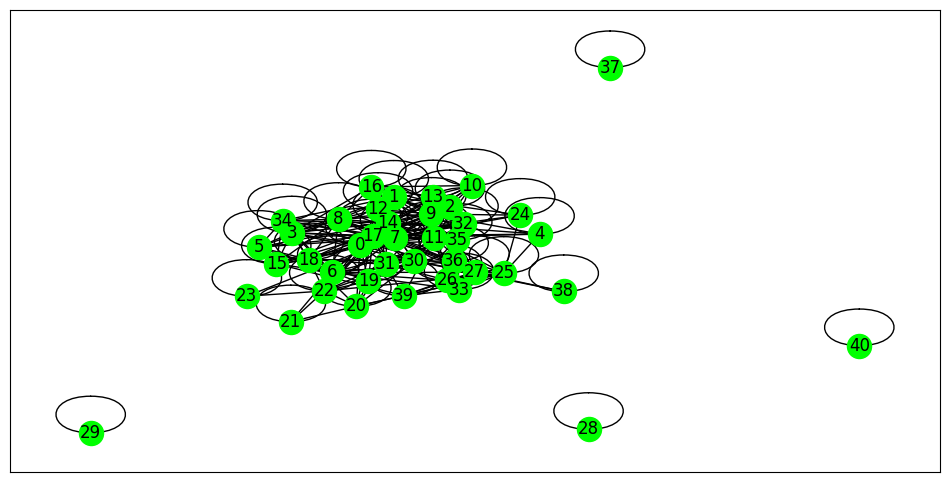

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [63]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score
                                            in scores.items()),
                          reverse=True)
ranked_sentences[:10]

[(0.03253380221089034, 14),
 (0.030435313860855212, 7),
 (0.029850254532246302, 11),
 (0.029114380974029196, 9),
 (0.028721243488514007, 17),
 (0.028606219810649963, 22),
 (0.02809148777534015, 26),
 (0.026499308291807744, 20),
 (0.026369454671346885, 35),
 (0.026189287657893162, 6)]

In [64]:
top_sentence_indices = [ranked_sentences[index][1]
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [66]:
print('\n'.join(np.array(sentence)[top_sentence_indices]))

This latter type gets something out of the relationship, but they'd survive without each other just fine.Periphytons are formed from a cross-species coupling of algae and fungi, together with plant detritus, microbes and bacteria (Credit: Getty Images)In this sense, while periphyton's slimy mixing of algae and fungal matter perhaps isn't nature's most glamourous pairing, it has resulted in a symbiotic romance which has lasted for "probably hundreds of millions of years" says Chabba.
Woolly bats and pitcher plants Not everyone could handle the carnivorous pitcher plant but the Borneo-based beauty has found its perfect match in the form of a woolly bat.
But it's not the bat the plant is after; this tropical hunter has eyes for only one thing: the bat's droppings.
They spend their days resting inside the plant, which offers the bats a safe refuge instead of turning them into food.Pitcher plants receive additional fertiliser from the droppings of woolly bats (Credit: Getty Images)Clover ro